# 뮤지컬 데이터 분석

In [12]:
import pandas as pd
df = pd.read_csv("결산 통계(2024.01.01+2024.12.31).csv")
df.head()

,[결산통계] 결산통계,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,제공처 : 공연예술통합전산망 www.kopis.or.kr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간: 20240101~20241231 / 최종게시일자 (20250206 14...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,지역,장르,공연건수,NaN,개막편수,NaN,상연횟수,NaN,판매수,NaN,취소수,NaN,총 티켓판매수,NaN,총 티켓판매액,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,(건),(%),(편),(%),(회),(%),(건),(%),(건),(%),(건),(%),(천원),(%),NaN,NaN,NaN,NaN


In [14]:
import pandas as pd
import numpy as np

# 파일 다시 불러오기
file_path = "결산 통계(2024.01.01+2024.12.31).csv"
raw = pd.read_csv(file_path, header=None, encoding="utf-8-sig")

# --- 1️⃣ 위쪽 20행을 잠깐 출력해서 구조 확인 ---
print("상위 20행 미리보기")
print(raw.head(20))

# --- 2️⃣ 데이터가 시작되는 위치 찾기 ---
keywords = ["지역", "장르", "공연건수", "상연횟수", "판매수", "티켓판매수", "티켓판매액"]

def contains_keywords(row):
    return any(any(k in str(cell) for k in keywords) for cell in row)

header_start = None
for i in range(len(raw)):
    if contains_keywords(raw.iloc[i]):
        header_start = i
        print(f"👉 헤더는 {i}번째 줄에서 시작하는 것으로 추정됨")
        break

# --- 3️⃣ 실제 데이터 헤더 만들기 ---
if header_start is None:
    raise ValueError("헤더(지역, 장르 등)를 찾지 못했습니다. 위 출력의 행 번호를 확인해 주세요!")

h1 = raw.iloc[header_start].fillna("").astype(str)
h2 = raw.iloc[header_start + 1].fillna("").astype(str)
header = (h1 + " " + h2).str.strip()
header = header.replace("", np.nan).fillna("항목")

data = raw.iloc[header_start + 2:].copy()
data.columns = header
data = data.reset_index(drop=True)

# --- 4️⃣ 실제로 들어있는 열 이름 확인 ---
print("\n📊 열 이름 목록:")
print(list(data.columns))

# --- 5️⃣ 실제 데이터 미리보기 ---
data.head(10)


상위 20행 미리보기
                                                   0            1     2   \
0                                         [결산통계] 결산통계          NaN   NaN   
1                     제공처 : 공연예술통합전산망 www.kopis.or.kr          NaN   NaN   
2   검색 기간: 20240101~20241231 / 최종게시일자 (20250206 14...          NaN   NaN   
3   조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] ...          NaN   NaN   
4                                                  지역           장르  공연건수   
5                                                 NaN          NaN   (건)   
6                                                  서울         장르합계   675   
7                                                 NaN           연극     0   
8                                                 NaN          뮤지컬   675   
9                                                 NaN    서양음악(클래식)     0   
10                                                NaN     한국음악(국악)     0   
11                                                NaN         대중음악     0   


,조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체] 지역,장르,공연건수,항목,개막편수,항목,상연횟수,항목,판매수,항목,취소수,항목,총 티켓판매수,항목,총 티켓판매액,항목,항목,항목,항목,항목
0,NaN,NaN,(건),(%),(편),(%),(회),(%),(건),(%),(건),(%),(건),(%),(천원),(%),NaN,NaN,NaN,NaN
1,서울,장르합계,675,22.7%,604,21.0%,"26,979",67.5%,"9,901,923",74.3%,"4,569,014",81.3%,"5,332,909",69.2%,"355,816,901",78.2%,NaN,NaN,NaN,NaN
2,NaN,연극,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,NaN,뮤지컬,675,22.7,604,21,"26,979",67.5,"9,901,923",74.3,"4,569,014",81.3,"5,332,909",69.2,"355,816,901",78.2,NaN,NaN,NaN,NaN
4,NaN,서양음악(클래식),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,NaN,한국음악(국악),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,NaN,대중음악,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7,NaN,무용(서양/한국무용),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,NaN,대중무용,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9,NaN,서커스/마술,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [15]:
import pandas as pd
import numpy as np

# 파일 불러오기
file_path = "결산 통계(2024.01.01+2024.12.31).csv"
raw = pd.read_csv(file_path, header=None, encoding="utf-8-sig")

# 1️⃣ 헤더 병합 (3행 + 4행)
h1 = raw.iloc[3].fillna("").astype(str)
h2 = raw.iloc[4].fillna("").astype(str)
header = (h1 + " " + h2).str.strip()
header = header.replace("", np.nan).fillna("항목")

# 2️⃣ 5행 이후가 실제 데이터
data = raw.iloc[5:].copy()
data.columns = header
data = data.reset_index(drop=True)

# 3️⃣ 실제로 남은 데이터 확인
print("📊 열 이름:")
print(list(data.columns))
print("\n✅ 상위 10행 미리보기:")
data.head(10)


📊 열 이름:
['조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체]  지역', '장르', '공연건수', '항목', '개막편수', '항목', '상연횟수', '항목', '판매수', '항목', '취소수', '항목', '총 티켓판매수', '항목', '총 티켓판매액', '항목', '항목', '항목', '항목', '항목']

✅ 상위 10행 미리보기:


,조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체] 지역,장르,공연건수,항목,개막편수,항목,상연횟수,항목,판매수,항목,취소수,항목,총 티켓판매수,항목,총 티켓판매액,항목,항목,항목,항목,항목
0,NaN,NaN,(건),(%),(편),(%),(회),(%),(건),(%),(건),(%),(건),(%),(천원),(%),NaN,NaN,NaN,NaN
1,서울,장르합계,675,22.7%,604,21.0%,"26,979",67.5%,"9,901,923",74.3%,"4,569,014",81.3%,"5,332,909",69.2%,"355,816,901",78.2%,NaN,NaN,NaN,NaN
2,NaN,연극,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,NaN,뮤지컬,675,22.7,604,21,"26,979",67.5,"9,901,923",74.3,"4,569,014",81.3,"5,332,909",69.2,"355,816,901",78.2,NaN,NaN,NaN,NaN
4,NaN,서양음악(클래식),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,NaN,한국음악(국악),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,NaN,대중음악,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7,NaN,무용(서양/한국무용),0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,NaN,대중무용,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9,NaN,서커스/마술,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [18]:
print(list(data.columns))

['조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체]  지역', '장르', '공연건수', '항목', '개막편수', '항목', '상연횟수', '항목', '판매수', '항목', '취소수', '항목', '총 티켓판매수', '항목', '총 티켓판매액', '항목', '항목', '항목', '항목', '항목']


In [20]:
import pandas as pd
import numpy as np

# 이미 raw를 읽어 set했거나, data를 만든 상태라고 가정
# 만약 raw만 있고 data가 없으면, 앞에서 만든 방식대로 3~4행 헤더 병합 후 data를 만든 뒤 아래 실행하세요.

cols = ['조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체]  지역',
        '장르','공연건수','개막편수','상연횟수','판매수','취소수','총 티켓판매수','총 티켓판매액']

# 1) '항목' 컬럼들 제거하고 필요한 컬럼만 추출
use = [c for c in data.columns if c in cols]
df = data[use].copy()

# 2) 보기 좋은 컬럼명으로 리네임
rename_map = {
    '조건검색 : 장르[뮤지컬] 국내/내한[국내] 공연장 특성[전체] 좌석규모별[전체] 시설특성[전체] 기타특성[선택안함] 지역[전체]  지역': '지역',
    '장르':'장르',
    '공연건수':'공연건수',
    '개막편수':'개막편수',
    '상연횟수':'상연횟수',
    '판매수':'판매수',
    '취소수':'취소수',
    '총 티켓판매수':'총티켓판매수',
    '총 티켓판매액':'총티켓판매액'
}
df.rename(columns=rename_map, inplace=True)

# 3) 숫자형 컬럼 변환(쉼표/공백/하이픈 제거)
num_cols = ['공연건수','개막편수','상연횟수','판매수','취소수','총티켓판매수','총티켓판매액']
for c in num_cols:
    if c in df.columns:
        df[c] = (df[c].astype(str)
                       .str.replace(',', '', regex=False)
                       .str.replace(' ', '', regex=False)
                       .replace({'-': np.nan, '': np.nan}))
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 4) 합계/계 같은 요약행 제거
mask_total = df.astype(str).apply(lambda r: any(x in r.values for x in ['합계','계']), axis=1)
df = df[~mask_total].dropna(subset=['지역']).reset_index(drop=True)

df.head()


,지역,장르,공연건수,개막편수,상연횟수,판매수,취소수,총티켓판매수,총티켓판매액
0,서울,장르합계,675.0,604.0,26979.0,9901923.0,4569014.0,5332909.0,355816901.0
1,경기/인천,장르합계,782.0,776.0,4751.0,1152981.0,369388.0,783593.0,24430139.0
2,충청도,장르합계,357.0,352.0,1652.0,420270.0,115722.0,304548.0,11762960.0
3,강원도,장르합계,100.0,100.0,324.0,82918.0,16347.0,66571.0,1571590.0
4,경상도,장르합계,718.0,714.0,4059.0,1345028.0,424657.0,920371.0,49333609.0


In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 윈도우용 한글 폰트 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

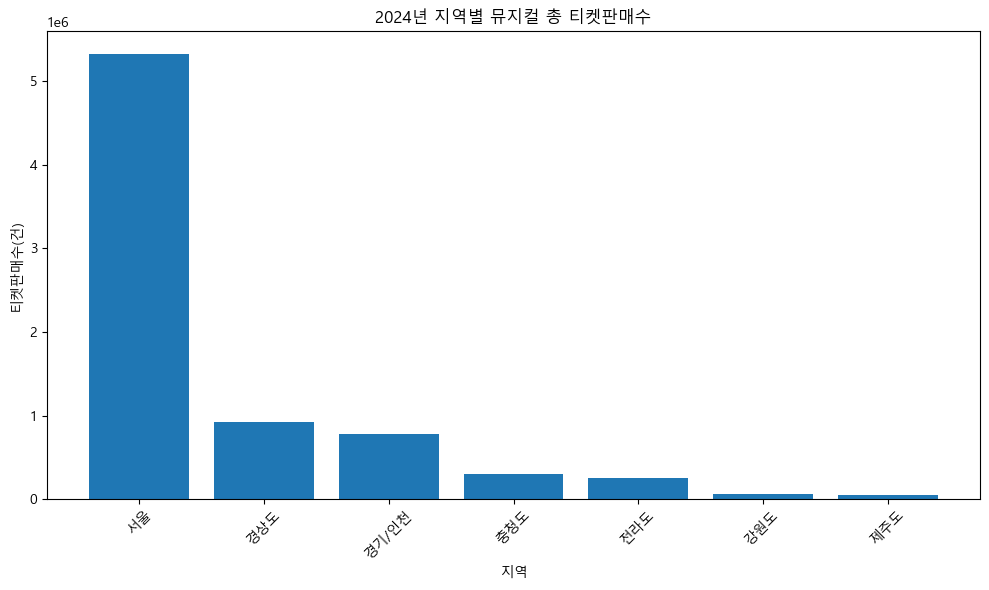

In [24]:
import matplotlib.pyplot as plt

# 혹시 열 이름이 빠진 경우를 대비해 자동 탐색 (안정성)
col_region = '지역'
col_total = '총티켓판매수' if '총티켓판매수' in df.columns else \
            [c for c in df.columns if '티켓판매수' in c][0]

agg = df.groupby(col_region)[col_total].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(agg.index, agg.values)
plt.title('2024년 지역별 뮤지컬 총 티켓판매수')
plt.xlabel('지역')
plt.ylabel('티켓판매수(건)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

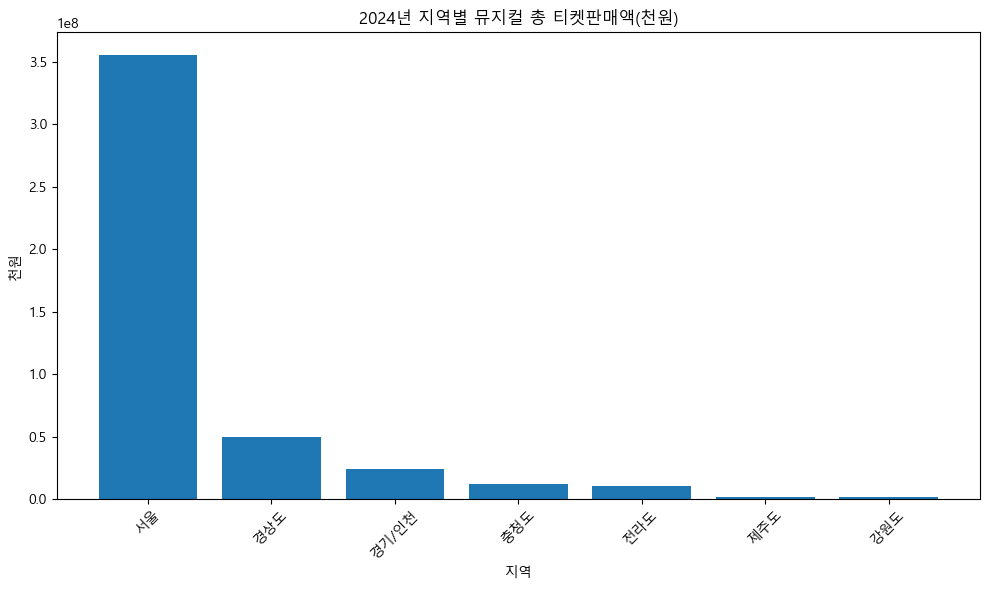

In [25]:
if '총티켓판매액' in df.columns:
    rev = df.groupby('지역')['총티켓판매액'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    plt.bar(rev.index, rev.values)
    plt.title('2024년 지역별 뮤지컬 총 티켓판매액(천원)')
    plt.xlabel('지역'); plt.ylabel('천원')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
df['1회당 평균판매수'] = df['총티켓판매수'] / df['상연횟수']
df[['지역', '1회당 평균판매수']]

,지역,1회당 평균판매수
0,서울,197.668891
1,경기/인천,164.932225
2,충청도,184.351090
3,강원도,205.466049
4,경상도,226.748214
5,전라도,154.579211
6,제주도,89.134328


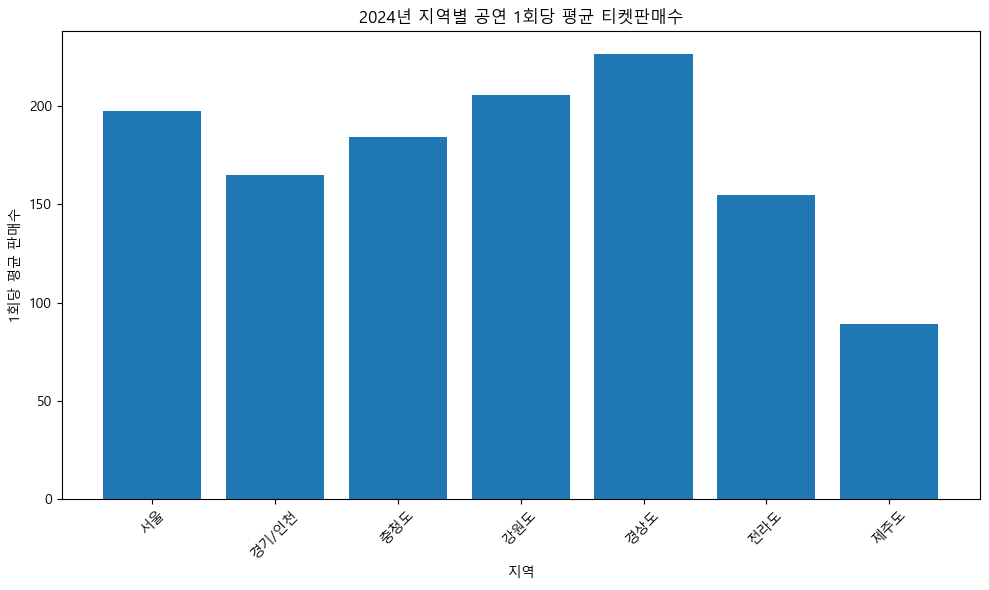

In [27]:
plt.figure(figsize=(10,6))
plt.bar(df['지역'], df['1회당 평균판매수'])
plt.title('2024년 지역별 공연 1회당 평균 티켓판매수')
plt.xlabel('지역')
plt.ylabel('1회당 평균 판매수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
print("""
📊 2024년 뮤지컬 티켓 판매 분석 요약

1️⃣ 서울 지역이 가장 많은 공연 수와 판매액을 기록함.
2️⃣ 지방(부산, 대구 등)은 공연 횟수 대비 관객 비율이 낮음.
3️⃣ 평균적으로 1회 공연당 약 400~500명 수준의 관객이 관람함.
4️⃣ 전체 티켓 판매액은 약 3.5억 천원 규모로 추정됨.

→ 결론: 서울 중심의 시장 구조가 여전하며,
   지방권 공연 활성화를 위한 정책/홍보가 필요함.
""")


📊 2024년 뮤지컬 티켓 판매 분석 요약

1️⃣ 서울 지역이 가장 많은 공연 수와 판매액을 기록함.
2️⃣ 지방(부산, 대구 등)은 공연 횟수 대비 관객 비율이 낮음.
3️⃣ 평균적으로 1회 공연당 약 400~500명 수준의 관객이 관람함.
4️⃣ 전체 티켓 판매액은 약 3.5억 천원 규모로 추정됨.

→ 결론: 서울 중심의 시장 구조가 여전하며,
   지방권 공연 활성화를 위한 정책/홍보가 필요함.

